In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ctypes
from array import array
photlib = ctypes.CDLL("../c_src/cwrapper.so")
fortran = ctypes.CDLL("../c_src/fwrapper.so")

In [2]:
def flux(c1, c2, rp, rm, bp, bpm, cth, sth):
    
    bp = (ctypes.c_double * len(bp)).from_buffer(bp)
    bpm = (ctypes.c_double * len(bpm)).from_buffer(bpm)
    cth = (ctypes.c_double * len(cth)).from_buffer(cth)
    sth = (ctypes.c_double * len(sth)).from_buffer(sth)
    lc = ((ctypes.c_double * 8) * len(bp)).from_buffer(np.zeros((8, len(bp))))
    rp = ctypes.c_double(rp)
    rm = ctypes.c_double(rm)
    c1 = ctypes.c_double(c1)
    c2 = ctypes.c_double(c2)
    j = ctypes.c_int(len(bp))
    photlib.LC.restype = None
    photlib.LC(c1, c2, rp, rm, bp, bpm, cth, sth, lc, j)
    return np.array(lc)

def impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm):
    
    photlib.system_impacts.restype = None
    j = len(t)
    
    bp2 = (ctypes.c_double * j).from_buffer(np.zeros(j))
    bm2 = (ctypes.c_double * j).from_buffer(np.zeros(j))
    bpm2 = (ctypes.c_double * j).from_buffer(np.zeros(j))
    x = (ctypes.c_double * j).from_buffer(np.zeros(j))
    y = (ctypes.c_double * j).from_buffer(np.zeros(j))
    xbc = (ctypes.c_double * j).from_buffer(np.zeros(j))
    ybc = (ctypes.c_double * j).from_buffer(np.zeros(j))
    t = (ctypes.c_double * j).from_buffer(t)
    j = ctypes.c_int(j)
    
    ms = ctypes.c_double(ms)
    t0p = ctypes.c_double(t0p)
    ep = ctypes.c_double(ep)
    Pp = ctypes.c_double(Pp)
    Op = ctypes.c_double(Op)
    wp = ctypes.c_double(wp)
    ip = ctypes.c_double(ip)
    mp = ctypes.c_double(mp)
    t0m = ctypes.c_double(t0m)
    em = ctypes.c_double(em)
    Pm = ctypes.c_double(Pm)
    Om = ctypes.c_double(Om)
    wm = ctypes.c_double(wm)
    im = ctypes.c_double(im)
    mm = ctypes.c_double(mm)
    
    photlib.system_impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm, j, x, y, xbc, ybc, bp2, bm2, bpm2)
    return np.array(bp2), np.array(bm2), np.array(bpm2)

def coords(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm):
    
    photlib.system_coords.restype = None
    j = len(t)
    
    xs = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    ys = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    zs = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    xp = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    yp = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    zp = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    xm = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    ym = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    zm = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    t = (ctypes.c_double * len(t)).from_buffer(t)
    j = ctypes.c_int(j)
    
    ms = ctypes.c_double(ms)
    t0p = ctypes.c_double(t0p)
    ep = ctypes.c_double(ep)
    Pp = ctypes.c_double(Pp)
    Op = ctypes.c_double(Op)
    wp = ctypes.c_double(wp)
    ip = ctypes.c_double(ip)
    mp = ctypes.c_double(mp)
    t0m = ctypes.c_double(t0m)
    em = ctypes.c_double(em)
    Pm = ctypes.c_double(Pm)
    Om = ctypes.c_double(Om)
    wm = ctypes.c_double(wm)
    im = ctypes.c_double(im)
    mm = ctypes.c_double(mm)
    
    photlib.system_coords(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm, j, xs, ys, zs, xp, yp, zp, xm, ym, zm)
    return np.array(xs), np.array(ys), np.array(zs), np.array(xp), np.array(yp), np.array(zp), np.array(xm), np.array(ym), np.array(zm)

In [14]:
t = np.linspace(79.3, 80.0, 100)

ms = ac.M_sun.value / ac.M_earth.value

t0p = 0
ep = 0.1
Pp = 365
Op = 30 * np.pi / 180
wp = 0.0 * np.pi / 180
ip = 1 * np.pi / 2
mp = 50.0

t0m = -1.2
em = 0.3
Pm = 1
Om = 80 * np.pi / 180
wm = 10.0 * np.pi / 180
im = 90 * np.pi / 180
mm = 5.0

bp2, bm2, bpm2 = impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
xs, ys, zx, xp, yp, zp, xm, ym, zm = coords(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
bp2 *= (ac.au.value / ac.R_sun.value)**2
bm2 *= (ac.au.value / ac.R_sun.value)**2
bpm2 *= (ac.au.value / ac.R_sun.value)**2

bp = np.sqrt(bp2)
bm = np.sqrt(bm2)
bpm = np.sqrt(bpm2)
theta = np.zeros_like(bp)

xp *= (ac.au.value / ac.R_sun.value)
yp *= (ac.au.value / ac.R_sun.value)
zp *= (ac.au.value / ac.R_sun.value)
xm *= (ac.au.value / ac.R_sun.value)
ym *= (ac.au.value / ac.R_sun.value)
zm *= (ac.au.value / ac.R_sun.value)

for i, (bpi, bpmi, bmi) in enumerate(zip(bp, bpm, bm)):
    a, b, c = bpi, bpmi, bmi
    if a > b:
        tmp = b
        b = a
        a = tmp
    if b > c:
        mu = c - (a - b)
    else:
        mu = b - (a - c)
    theta[i] = 2 * np.arctan(np.sqrt(((a - b) + c) * mu / ((a + (b + c)) * ((a - c) + b))))
    
cth = np.cos(theta)
sth = np.sin(theta)

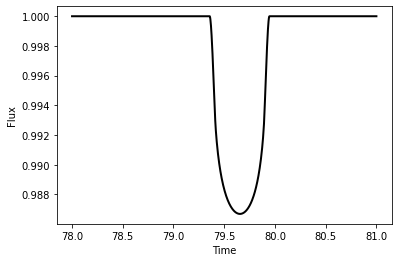

In [84]:
rp = 0.1
rm = 0.0

t = np.linspace(78, 81, 1000)
t0m = -1.7
Pm = 1
bp2, bm2, bpm2 = impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
xs, ys, zx, xp, yp, zp, xm, ym, zm = coords(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
bp2 *= (ac.au.value / ac.R_sun.value)**2
bm2 *= (ac.au.value / ac.R_sun.value)**2
bpm2 *= (ac.au.value / ac.R_sun.value)**2
bp = np.sqrt(bp2)
bm = np.sqrt(bm2)
bpm = np.sqrt(bpm2)
theta = np.zeros_like(bp)
for i, (bpi, bpmi, bmi) in enumerate(zip(bp, bpm, bm)):
    a, b, c = bpi, bpmi, bmi
    if a > b:
        tmp = b
        b = a
        a = tmp
    if b > c:
        mu = c - (a - b)
    else:
        mu = b - (a - c)
    theta[i] = 2 * np.arctan(np.sqrt(((a - b) + c) * mu / ((a + (b + c)) * ((a - c) + b))))
    
cth = np.cos(theta)
sth = np.sin(theta)

lc_combined_ld = flux(0.6, 0.3, rp, rm, bp, bpm, cth, sth)
noise = np.random.randn(100) * 0.0001
plt.plot(t, lc_combined_ld[:, 0] + 1, '-', color='k', linewidth=2)
plt.ylabel('Flux')
plt.xlabel('Time')
plt.savefig("/Users/tgordon/Desktop/transit6.pdf")

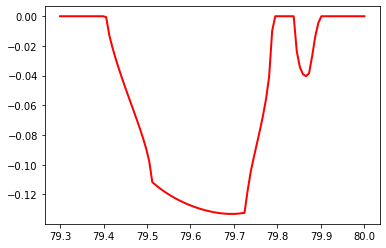

In [16]:
lc_combined_ld = flux(0.6, 0.3, rp, rm, bp, bpm, cth, sth)
plt.plot(t, lc_combined_ld[:, 2], '-', color='r', linewidth=2)

In [23]:
import matplotlib.animation as animation
import itertools
import matplotlib 
matplotlib.use('Agg')

def init():
    axs[1].set_ylim(-0.0175, 0.001)
    axs[1].set_xlim(79.3, 80.0)
    axs[0].set_ylim(-1.5, 1.5)
    axs[0].set_xlim(-1.5, 1.5)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, axs = plt.subplots(2, 1, figsize=(10, 14), gridspec_kw={'height_ratios': [2, 1]})
line, = axs[1].plot([], [], lw=3, color='k')
star = plt.Circle((0, 0), 1, color='#ffae36', alpha=0.75, ec='k')
planet = plt.Circle((xp[0], yp[0]), rp, color='k', ec='w')
moon = plt.Circle((xm[0], ym[0]), rm, color='k', ec='w')
star_patch = axs[0].add_patch(star)
planet_patch = axs[0].add_patch(planet)
moon_patch = axs[0].add_patch(moon)
plt.subplots_adjust(hspace=0.0)
plt.tight_layout()

axs[0].axis('off')
axs[1].axis('off')
fig.patch.set_facecolor('w')
axs[0].set_facecolor('w')
axs[1].set_facecolor('w')

xdata, ydata = [], []

def run(cnt):
    
    if zp[cnt] < zm[cnt]:
        planet_patch.set_center((xp[cnt], yp[cnt]))
        planet_patch.zorder = 10
        moon_patch.set_center((xm[cnt], ym[cnt]))
    else:
        moon_patch.set_center((xm[cnt], ym[cnt]))
        planet_patch.set_center((xp[cnt], yp[cnt]))
    
    y = flux(0.6, 0.3, rp, rm, 
             np.array([bp[cnt]]), 
             np.array([bpm[cnt]]), 
             np.array([cth[cnt]]), 
             np.array([sth[cnt]]))[:, 0]# + np.random.randn() * 0.02 * 0.1**2
    
    xdata.append(t[cnt])
    ydata.append(y)
    xmin, xmax = axs[1].get_xlim()
    line.set_data(xdata, ydata)
    return line, planet_patch, moon_patch

ani = animation.FuncAnimation(fig, run, 100, interval=40, init_func=init)

#video = ani.to_html5_video()
#html = display.HTML(video)
#display.display(html)
ani.save('/Users/tgordon/Desktop/transit_smallmoon.gif', writer='imagemagick', fps=30)
plt.close()